In [1]:
import numpy as np
import librosa
import librosa.display as lbd  
import matplotlib.pyplot as plt
import IPython

In [2]:
from scipy.io.wavfile import write as write_wav

In [3]:
%matplotlib inline

In [4]:
###

In [5]:
signal, sr = librosa.load('New-Composition-_3.wav')

In [6]:
# 
n_fft = 2048
hop_len = n_fft//4

In [7]:
y = librosa.stft(signal, n_fft = n_fft, hop_length = hop_len)
S_db = librosa.amplitude_to_db(np.abs(y))

In [8]:
time = np.linspace(0, 1/sr*len(signal), num = len(signal))

In [9]:
##

In [10]:
tempo, beats = librosa.beat.beat_track(y=signal, sr=sr)

In [11]:
tempo

117.45383522727273

In [12]:
beats_time = librosa.frames_to_time(beats, sr=sr)

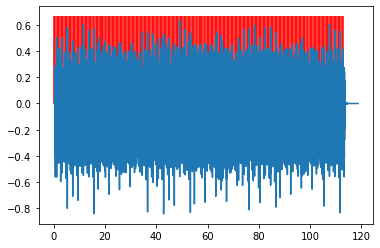

In [13]:
fig, ax = plt.subplots()
ax.plot(time, signal)
max_val = np.amax(signal)*1.05

for b in beats_time:
    ax.vlines(b, 0, max_val, 'r')

In [ ]:
##

In [14]:
n_mfcc = 20
n_fft = 1024
hop_length = n_fft//4

In [15]:
mfc_coef = librosa.feature.mfcc(y=signal, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mfcc=n_mfcc)

In [16]:
mfc_coef.shape

(20, 10227)

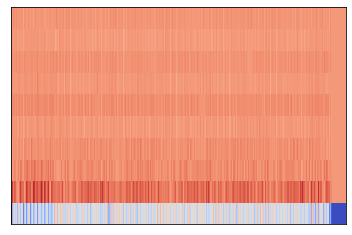

In [17]:
librosa.display.specshow(mfc_coef[0:10, :])

In [ ]:
###

In [18]:
y_harmonic, y_percussive = librosa.decompose.hpss(y, margin=1.0)

In [19]:
rp = np.max(np.abs(y))

In [20]:
S_db_harmonic, S_db_percussive = \
    librosa.amplitude_to_db(np.abs(y_harmonic), ref=rp), librosa.amplitude_to_db(np.abs(y_percussive), ref=rp)

Text(0.5, 1.0, 'Full spectrogram')

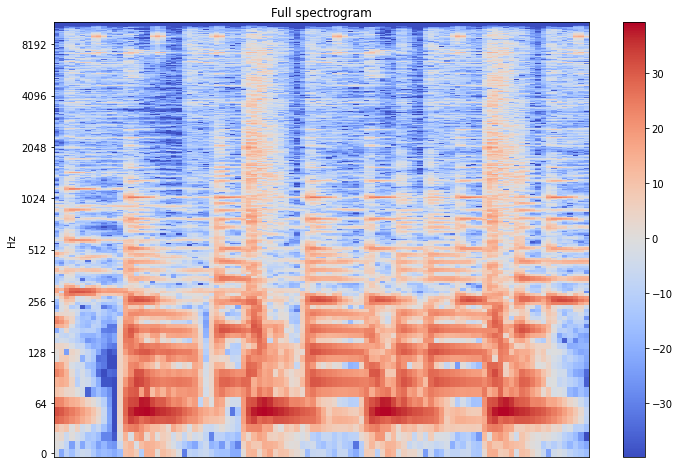

In [21]:
plt.figure(figsize=(12, 8))

librosa.display.specshow(S_db[:, 1000:1100], y_axis='log')
plt.colorbar()
plt.title('Full spectrogram')

Text(0.5, 1.0, 'Harmonic spectrogram')

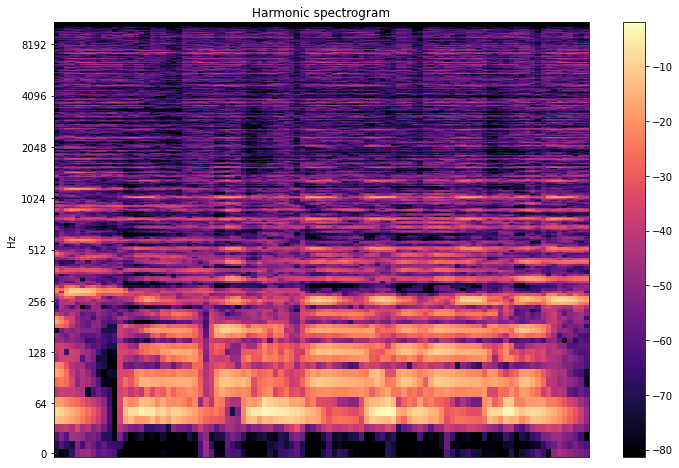

In [22]:
plt.figure(figsize=(12, 8))
librosa.display.specshow(S_db_harmonic[:, 1000:1100], y_axis='log')
plt.colorbar()
plt.title('Harmonic spectrogram')

Text(0.5, 1.0, 'Percussive spectrogram')

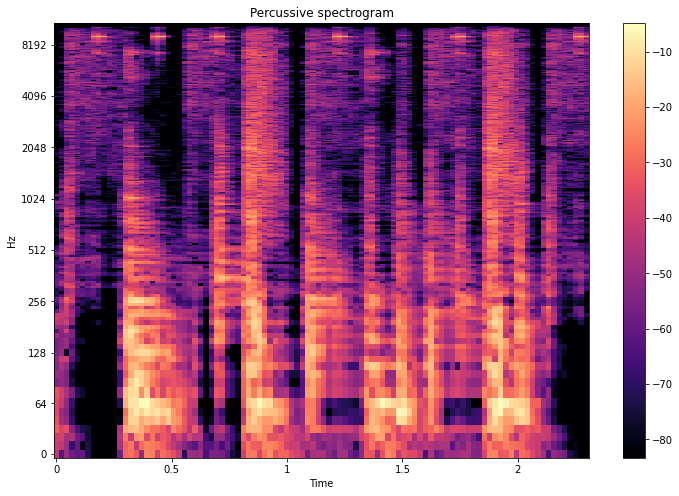

In [23]:
plt.figure(figsize=(12, 8))
librosa.display.specshow(S_db_percussive[:, 1000:1100], y_axis='log', x_axis='time')
plt.colorbar()
plt.title('Percussive spectrogram')

In [ ]:
## inversing

In [24]:
sig_percussive = librosa.istft(y_percussive)

In [25]:
sig_harmonic = librosa.istft(y_harmonic)

In [ ]:
fig, ax = plt.subplots()
lbd.waveshow(sig_percussive, sr=sr, ax=ax)

In [ ]:
IPython.display.Audio(data = sig_percussive, rate=sr)

In [ ]:
IPython.display.Audio(data = sig_harmonic, rate=sr)

In [ ]:
# save

In [ ]:
write_wav('precussive.wav', sr, sig_percussive)

In [ ]:
write_wav('harmonic.wav', sr, sig_harmonic)